# Numpy basics


Examples from the book [Numerical Python](https://jrjohansson.github.io/numericalpython.html) by Robert Johansson. A [PDF Version](https://mathstat.dal.ca/~brown/sound/python/Numerical%20Python.pdf) is also available. THis notebook looks at various basic `.ndarray` datatype and array functions provided by NumPY.

## Basic Library IPython
Can be used to show, Math formulaes, images and HTML or markdown content.

In [1]:
from IPython.display import Math, Image, display, HTML
import numpy as np
from matplotlib import pyplot as plt

# Example of a Latex expression
Math(r'\hat{x} = \frac{1}{N} \sum_{n=1}^{N} x_n')

<IPython.core.display.Math object>

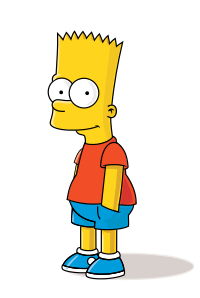

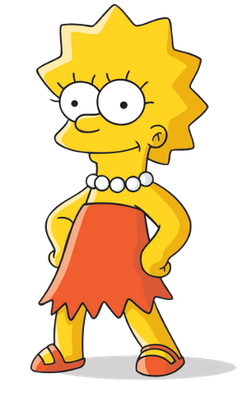

In [2]:
# Images from a URL
bart_simpson_url = 'https://upload.wikimedia.org/wikipedia/en/a/aa/Bart_Simpson_200px.png'
lisa_simpson_url = 'https://upload.wikimedia.org/wikipedia/en/e/ec/Lisa_Simpson.png'
display(Image(bart_simpson_url, width=50))
display(Image(lisa_simpson_url, width=50))


# Basic NumPy array

### Basic Data Types
The basic dtypes held by NumPy are:
1. Integers: `int`: `int8, int16, int32, int64` 
2. Unsigned positive) Integers `int`: `uint8, uint16, uint32, uint64`
3. Boolean `bool`: `Bool` 
5. FLoating point `float`: `float16, float32, float64, float128`
6. Complex `complex`: `comlpex64, complex128, complex256`

The data-types may be promoted if required by operation. Once created NP array do not change. The arrays are stored in contigious data memory. The storage order by row-major (__C__, C-language) or column-major (__F__ FOrtran language) can be set using `order='C'` argument. Not the it is how it stored in memory, `flatten()` is always C-wise

In [3]:
def print_array_info(v, prefix):
    print("-"*40)
    print(prefix)
    print(f"Shape: {v.shape}, dtype: {v.dtype}, NDim: {v.ndim}")
    print(f"size: {v.size} *  itemsize: {v.itemsize} = nbytes: {v.nbytes}")

def print_array(v, prefix):
    print_array_info(v, prefix)
    dimensions = v.ndim
    if dimensions == 1:
        print(f"{prefix}: {v}")
    else:
        print(f"{prefix}:")
        for i in range(v.shape[0]):
            print(f"  {v[i, :]}")

In [4]:
v1 = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.complex128, order='C')
v2 = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.complex128, order='F')

print_array(v1, "v1")
print_array(v2, "v2")
print(f"Flattened array v1 order C: {v1.flatten()}")
print(f"Flattened array v2 order C: {v2.flatten()}")
print(f"Flattened array v2 order F: {v2.flatten(order='F')}")

----------------------------------------
v1
Shape: (2, 3), dtype: complex128, NDim: 2
size: 6 *  itemsize: 16 = nbytes: 96
v1:
  [1.+0.j 2.+0.j 3.+0.j]
  [4.+0.j 5.+0.j 6.+0.j]
----------------------------------------
v2
Shape: (2, 3), dtype: complex128, NDim: 2
size: 6 *  itemsize: 16 = nbytes: 96
v2:
  [1.+0.j 2.+0.j 3.+0.j]
  [4.+0.j 5.+0.j 6.+0.j]
Flattened array v1 order C: [1.+0.j 2.+0.j 3.+0.j 4.+0.j 5.+0.j 6.+0.j]
Flattened array v2 order C: [1.+0.j 2.+0.j 3.+0.j 4.+0.j 5.+0.j 6.+0.j]
Flattened array v2 order F: [1.+0.j 4.+0.j 2.+0.j 5.+0.j 3.+0.j 6.+0.j]


### Creation of arrays

| Function Name                      | Type of Array                                                                                         |
|-----------------------------------|--------------------------------------------------------------------------------------------------------|
| `np.array`                        | Creates an array for which the elements are given by an array-like object, such as a list or tuple.   |
| `np.zeros`                        | Creates an array with the specified dimensions and data type that is filled with zeros.               |
| `np.ones`                         | Creates an array with the specified dimensions and data type that is filled with ones.                |
| `np.diag`                         | Creates a diagonal array with specified values along the diagonal and zeros elsewhere.                |
| `np.arange`                       | Creates an array with evenly spaced values between the specified start, end, and increment values.    |
| `np.linspace`                     | Creates an array with evenly spaced values between specified start and end values.                    |
| `np.logspace`                     | Creates an array with values that are logarithmically spaced between the given start and end values.  |
| `np.meshgrid`                     | Generates coordinate matrices (and higher-dimensional coordinate arrays) from 1D coordinate vectors.  |
| `np.fromfunction`                 | Creates an array filled with values from a function evaluated at each index coordinate.               |
| `np.fromfile`                     | Creates an array with data from a binary (or text) file. Can be paired with `np.tofile`.              |
| `np.genfromtxt`, `np.loadtxt`     | Create arrays from CSV or text data. `np.genfromtxt` supports missing values.                         |
| `np.random.rand`                  | Generates an array with uniformly distributed random numbers between 0 and 1.                         |


In [5]:
v1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
v2 = np.zeros(10)
v3 = np.ones(10)
v4 = np.empty(10)
v5 = np.full(10, 10)
v6 = np.eye(10, 10, 2) + np.eye(10, 10, -2)
v7 = np.diag([1, 2, 3, 4])
v8 = np.arange(10, 50, 5)
v9 = np.linspace(10, 45, 8) # 8 equidistant points between 10 and 45 (inclusive)
print(v1.shape)
print_array(v1, "v1")
print_array(v2, "v2")
print_array(v3, "v3")
print_array(v4, "v4")
print_array(v5, "v5")

(10,)
----------------------------------------
v1
Shape: (10,), dtype: int64, NDim: 1
size: 10 *  itemsize: 8 = nbytes: 80
v1: [ 1  2  3  4  5  6  7  8  9 10]
----------------------------------------
v2
Shape: (10,), dtype: float64, NDim: 1
size: 10 *  itemsize: 8 = nbytes: 80
v2: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----------------------------------------
v3
Shape: (10,), dtype: float64, NDim: 1
size: 10 *  itemsize: 8 = nbytes: 80
v3: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
----------------------------------------
v4
Shape: (10,), dtype: float64, NDim: 1
size: 10 *  itemsize: 8 = nbytes: 80
v4: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----------------------------------------
v5
Shape: (10,), dtype: int64, NDim: 1
size: 10 *  itemsize: 8 = nbytes: 80
v5: [10 10 10 10 10 10 10 10 10 10]


In [6]:
print_array(v6, "v6")
print_array(v7, "v7")

----------------------------------------
v6
Shape: (10, 10), dtype: float64, NDim: 2
size: 100 *  itemsize: 8 = nbytes: 800
v6:
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
----------------------------------------
v7
Shape: (4, 4), dtype: int64, NDim: 2
size: 16 *  itemsize: 8 = nbytes: 128
v7:
  [1 0 0 0]
  [0 2 0 0]
  [0 0 3 0]
  [0 0 0 4]


In [7]:
print_array(v8, "v8")
print_array(np.round(v9, 2), "v9")

----------------------------------------
v8
Shape: (8,), dtype: int64, NDim: 1
size: 8 *  itemsize: 8 = nbytes: 64
v8: [10 15 20 25 30 35 40 45]
----------------------------------------
v9
Shape: (8,), dtype: float64, NDim: 1
size: 8 *  itemsize: 8 = nbytes: 64
v9: [10. 15. 20. 25. 30. 35. 40. 45.]


In [8]:
# Note use of two NP functions to format the output
print_array(np.round(v6, 2), "v6")
# vectorize applies the lambda function to each element of the array
formatter = np.vectorize(lambda x: f"{x:.2e}")
print_array(formatter(v7), "v7")

----------------------------------------
v6
Shape: (10, 10), dtype: float64, NDim: 2
size: 100 *  itemsize: 8 = nbytes: 800
v6:
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
----------------------------------------
v7
Shape: (4, 4), dtype: <U8, NDim: 2
size: 16 *  itemsize: 32 = nbytes: 512
v7:
  ['1.00e+00' '0.00e+00' '0.00e+00' '0.00e+00']
  ['0.00e+00' '2.00e+00' '0.00e+00' '0.00e+00']
  ['0.00e+00' '0.00e+00' '3.00e+00' '0.00e+00']
  ['0.00e+00' '0.00e+00' '0.00e+00' '4.00e+00']


#### Reading data from files

| Function         | Use Case                                      | Header Skipping         | Handles Missing Data     | Format Support        |
|------------------|-----------------------------------------------|--------------------------|---------------------------|------------------------|
| `np.fromfile`     | Binary files or raw text with no structure    | ❌ Not directly supported | ❌ No                     | `.bin`, raw `.txt`     |
| `np.loadtxt`      | Simple, clean text files (e.g. CSVs)          | ✅ `skiprows=1`           | ❌ No                     | Text/CSV               |
| `np.genfromtxt`   | Text files with missing values, CSVs          | ✅ `skip_header=1`        | ✅ Yes                    | Text/CSV with gaps     |

In [9]:
# Read from file
v10 = np.loadtxt('../data/weather-data-gilroy.csv',
                 dtype=np.float32, delimiter=',',
                 skiprows=1)
print_array_info(v10, "v10")

----------------------------------------
v10
Shape: (366, 11), dtype: float32, NDim: 2
size: 4026 *  itemsize: 4 = nbytes: 16104


In [10]:
v11 = np.genfromtxt('../data/weather-data-gilroy.csv',
                  dtype=np.float32, delimiter=',',
                  skip_header=1)
print_array_info(v11, "v11")

----------------------------------------
v11
Shape: (366, 11), dtype: float32, NDim: 2
size: 4026 *  itemsize: 4 = nbytes: 16104


In [11]:
# Are v10 and v11 the same?
print("v10 and v11 are the same:", np.array_equal(v10, v11))
# What is the difference?
print("Difference between v10 and v11:", np.setdiff1d(v10, v11), np.setdiff1d(v11, v10))


v10 and v11 are the same: True
Difference between v10 and v11: [] []


### Meshgrid

Generates coordinate matrices from 1D coordinate vectors. The indexsing options are `"xy" or "ij"`, where in `"xy"` for input (M,N) the output is dimensiton (N,M) and for `"ij"` it is (M,N)

In [12]:
x = np.linspace(-5, 6, 100)
y = np.linspace(-2, 3, 50)
X, Y = np.meshgrid(x, y)
XI, YI = np.meshgrid(x, y, indexing="ij")
print_array_info(x, "x")
print_array_info(y, "y")
print_array_info(X, "X")
print_array_info(Y, "Y")
print_array_info(XI, "XI")
print_array_info(YI, "YI")

----------------------------------------
x
Shape: (100,), dtype: float64, NDim: 1
size: 100 *  itemsize: 8 = nbytes: 800
----------------------------------------
y
Shape: (50,), dtype: float64, NDim: 1
size: 50 *  itemsize: 8 = nbytes: 400
----------------------------------------
X
Shape: (50, 100), dtype: float64, NDim: 2
size: 5000 *  itemsize: 8 = nbytes: 40000
----------------------------------------
Y
Shape: (50, 100), dtype: float64, NDim: 2
size: 5000 *  itemsize: 8 = nbytes: 40000
----------------------------------------
XI
Shape: (100, 50), dtype: float64, NDim: 2
size: 5000 *  itemsize: 8 = nbytes: 40000
----------------------------------------
YI
Shape: (100, 50), dtype: float64, NDim: 2
size: 5000 *  itemsize: 8 = nbytes: 40000


In [13]:
Z = np.sqrt(X**2 + Y**2)
print_array_info(np.round(Z, 2), "Z")

----------------------------------------
Z
Shape: (50, 100), dtype: float64, NDim: 2
size: 5000 *  itemsize: 8 = nbytes: 40000


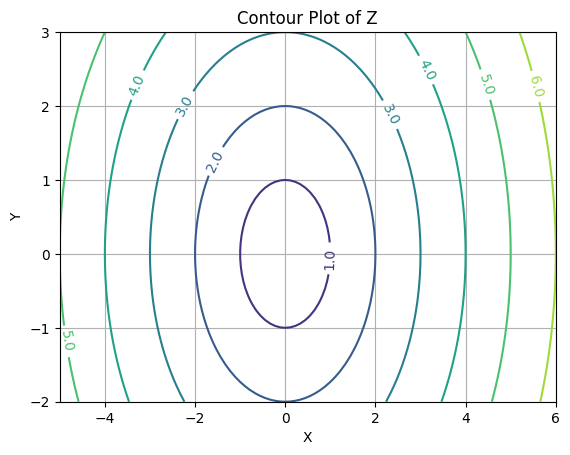

In [14]:
# Make contour plot
contours = plt.contour(X, Y, Z)
plt.xlabel('X')
plt.ylabel('Y')
plt.clabel(contours, inline=True, fontsize=10, fmt="%.1f")
plt.title('Contour Plot of Z')
plt.grid(True)
plt.show()

#### Indexing and Slicing

The elements or subarrays are accessed using standard square `[]` brackets. 
1. Indexing and slicing, creates __a view__ into the original array.
   - 1D are acessed using `a[m], a[-m], a[m:n], a[:], a[0:-1], a[m:], a[m:-1], a[m:n:p] a[::-1]`
   - 2D are accessed as `a[row, col]` with various options as 1D array above.
3. Fancy indexing is using another NumPy array as array of indices or a Boolean mask. Note that it returns a __new array, NOT a view__.

In [15]:
# Examples 1D
a = np.arange(10)
print(f"a[:]:     {a[:]}")
print(f"a[0:]:    {a[0:]}")
print(f"a[0:-1]:  {a[0:-1]}") # Exclude last element
print(f"a[::-1]:  {a[::-1]}")  # Reverse the array
print(f"a[0:3:2]: {a[0:3:2]}") # Step by 2
print(f"a[0]: {a[0]}, a[-1]: {a[-1]}, a[0:3]: {a[0:3]}")
b_view = a[0:3]
b_view[0], b_view[1], b_view[2] = 100, 101, 102
print(f"b_view: {b_view}, a: {a}")

a[:]:     [0 1 2 3 4 5 6 7 8 9]
a[0:]:    [0 1 2 3 4 5 6 7 8 9]
a[0:-1]:  [0 1 2 3 4 5 6 7 8]
a[::-1]:  [9 8 7 6 5 4 3 2 1 0]
a[0:3:2]: [0 2]
a[0]: 0, a[-1]: 9, a[0:3]: [0 1 2]
b_view: [100 101 102], a: [100 101 102   3   4   5   6   7   8   9]


In [16]:
# 1D: Fancy indexing
a = np.arange(10)
odd_indices = np.arange(1, 10, 2)
even_indices = np.arange(0, 10, 2)
print(f"odd_indices:  {odd_indices},  a[odd_indices]: {a[odd_indices]}")
print(f"even_indices: {even_indices}, a[even_indices]: {a[even_indices]}")
gt_mask = a > 5
print(f"gt_mask: {gt_mask}, a[gt_mask]: {a[gt_mask]}")
lt_mask = a < 3
print(f"lt_mask: {lt_mask}, a[lt_mask]: {a[lt_mask]}")

# View versus copy
a_odd = a[odd_indices]
a_odd *= 3
print(f"a: {a}, Original is unchanged")
print(f"a_odd: {a_odd}, a_odd is a NOT view of a")

odd_indices:  [1 3 5 7 9],  a[odd_indices]: [1 3 5 7 9]
even_indices: [0 2 4 6 8], a[even_indices]: [0 2 4 6 8]
gt_mask: [False False False False False False  True  True  True  True], a[gt_mask]: [6 7 8 9]
lt_mask: [ True  True  True False False False False False False False], a[lt_mask]: [0 1 2]
a: [0 1 2 3 4 5 6 7 8 9], Original is unchanged
a_odd: [ 3  9 15 21 27], a_odd is a NOT view of a


In [17]:
# Example 2D
f = lambda m, n: 100 * (m+1) + n + 1
a = np.fromfunction(f, (7, 7), dtype=int)
print_array(a, "a")
# View
top_left_view = a[:2, :2].copy()
top_left_view.fill(1000)
mid_view = a[2:5, 2:5]
mid_view.fill(0)
print_array(a, "a") # Orignial is changed

----------------------------------------
a
Shape: (7, 7), dtype: int64, NDim: 2
size: 49 *  itemsize: 8 = nbytes: 392
a:
  [101 102 103 104 105 106 107]
  [201 202 203 204 205 206 207]
  [301 302 303 304 305 306 307]
  [401 402 403 404 405 406 407]
  [501 502 503 504 505 506 507]
  [601 602 603 604 605 606 607]
  [701 702 703 704 705 706 707]
----------------------------------------
a
Shape: (7, 7), dtype: int64, NDim: 2
size: 49 *  itemsize: 8 = nbytes: 392
a:
  [101 102 103 104 105 106 107]
  [201 202 203 204 205 206 207]
  [301 302   0   0   0 306 307]
  [401 402   0   0   0 406 407]
  [501 502   0   0   0 506 507]
  [601 602 603 604 605 606 607]
  [701 702 703 704 705 706 707]


In [18]:
print_array(top_left_view, "top_left_view")
print(f"a[2, 3]: {a[2, 3]}")
print(f"a[2, :]: {a[2, :]}")
print(f"a[:, 3]: {a[:, 3]}")

----------------------------------------
top_left_view
Shape: (2, 2), dtype: int64, NDim: 2
size: 4 *  itemsize: 8 = nbytes: 32
top_left_view:
  [1000 1000]
  [1000 1000]
a[2, 3]: 0
a[2, :]: [301 302   0   0   0 306 307]
a[:, 3]: [104 204   0   0   0 604 704]


#### 📐 NumPy Array Shape and Transformation Functions

Use the followings to reshape the dimensions.

##### 🧩 Reshaping, Flattening, and Dimensionality Utilities

| Function / Method                             | Description                                                                                         |
|----------------------------------------------|-----------------------------------------------------------------------------------------------------|
| `np.reshape`, `ndarray.reshape`              | Reshape an N-dimensional array. The total number of elements must remain the same.                  |
| `np.ndarray.flatten`                         | Creates a **copy** of an N-D array, reinterpreted as a 1D array (collapses all dimensions).         |
| `np.ravel`, `ndarray.ravel`                  | Creates a **view** (if possible) of the array, collapsed to 1D.                                     |
| `np.squeeze`                                 | Removes axes with length 1.                                                                         |
| `np.expand_dims`, `np.newaxis`               | Adds a new axis (dimension) of length 1. `np.newaxis` is used in array slicing for broadcasting.    |
| `np.transpose`, `ndarray.transpose`, `T`     | Transposes (or permutes) the axes of the array.                                                     |



In [19]:
u2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
vf2 = u2.flatten()
vr2 = u2.ravel()
vr2[4] = 0 # View, changes original
vf2[4] = -1 # Copy, does not change original
print_array(u2, "u2, changed")
print_array(vf2, "vf2")
print_array(vr2, "vr2")

----------------------------------------
u2, changed
Shape: (3, 3), dtype: int64, NDim: 2
size: 9 *  itemsize: 8 = nbytes: 72
u2, changed:
  [1 2 3]
  [4 0 6]
  [7 8 9]
----------------------------------------
vf2
Shape: (9,), dtype: int64, NDim: 1
size: 9 *  itemsize: 8 = nbytes: 72
vf2: [ 1  2  3  4 -1  6  7  8  9]
----------------------------------------
vr2
Shape: (9,), dtype: int64, NDim: 1
size: 9 *  itemsize: 8 = nbytes: 72
vr2: [1 2 3 4 0 6 7 8 9]


In [20]:
print_array(u2.T, "u2 (transposed)")

----------------------------------------
u2 (transposed)
Shape: (3, 3), dtype: int64, NDim: 2
size: 9 *  itemsize: 8 = nbytes: 72
u2 (transposed):
  [1 4 7]
  [2 0 8]
  [3 6 9]


##### 🔗 Array Stacking and Concatenation

| Function           | Description                                                                                       |
|--------------------|---------------------------------------------------------------------------------------------------|
| `np.hstack`        | Stacks arrays **horizontally** (along axis 1). Appends columns (e.g., column vectors → matrix).    |
| `np.vstack`        | Stacks arrays **vertically** (along axis 0). Appends rows (e.g., row vectors → matrix).           |
| `np.dstack`        | Stacks arrays **depth-wise** (along axis 2).                                                      |
| `np.concatenate`   | Concatenates arrays along any given axis.                                                         |



In [21]:
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
v3 = np.hstack((v1, v2)) # Horizontal stacking
v4 = np.vstack((v1, v2)) # Row wise stacking
v5 = np.dstack((v1, v2)) # Column wise stacking
print_array(v3, "v3")
print_array(v4, "v4")
print_array(v5, "v5")


----------------------------------------
v3
Shape: (6,), dtype: int64, NDim: 1
size: 6 *  itemsize: 8 = nbytes: 48
v3: [1 2 3 4 5 6]
----------------------------------------
v4
Shape: (2, 3), dtype: int64, NDim: 2
size: 6 *  itemsize: 8 = nbytes: 48
v4:
  [1 2 3]
  [4 5 6]
----------------------------------------
v5
Shape: (1, 3, 2), dtype: int64, NDim: 3
size: 6 *  itemsize: 8 = nbytes: 48
v5:
  [[1 4]
 [2 5]
 [3 6]]


##### ✂️ Array Editing Utilities

| Function       | Description                                                                                          |
|----------------|------------------------------------------------------------------------------------------------------|
| `np.resize`    | Resizes an array to a new shape. If necessary, data is **repeated** to fill the new size.            |
| `np.append`    | Appends values to the end of an array. Creates a new array.                                          |
| `np.insert`    | Inserts values at a given index. Creates a new array.                                                |
| `np.delete`    | Deletes values at a given index. Creates a new array.                                                |

In [22]:
v1 = np.arange(5)
v2 = np.append(v1, 5) # Create new array not view
v2[0] = 100
print_array(v1, "v1")
print_array(v2, "v2")


----------------------------------------
v1
Shape: (5,), dtype: int64, NDim: 1
size: 5 *  itemsize: 8 = nbytes: 40
v1: [0 1 2 3 4]
----------------------------------------
v2
Shape: (6,), dtype: int64, NDim: 1
size: 6 *  itemsize: 8 = nbytes: 48
v2: [100   1   2   3   4   5]


### Element-wise Operations

Each of these functions aplies to  each element of the NP array. They return same shape as input array.


##### 🧮 NumPy Mathematical Functions

| NumPy Function                                      | Description                                  |
|----------------------------------------------------|----------------------------------------------|
| `np.cos`, `np.sin`, `np.tan`                       | Trigonometric functions.                     |
| `np.arccos`, `np.arcsin`, `np.arctan`              | Inverse trigonometric functions.             |
| `np.cosh`, `np.sinh`, `np.tanh`                    | Hyperbolic trigonometric functions.          |
| `np.arccosh`, `np.arcsinh`, `np.arctanh`           | Inverse hyperbolic trigonometric functions.  |
| `np.sqrt`                                          | Square root.                                 |
| `np.exp`                                           | Exponential.                                 |
| `np.log`, `np.log2`, `np.log10`                    | Logarithms of base *e*, 2, and 10 respectively. |

Some others are: `np.add, .subtract, .multiply, .divide, .power, .remainder, .reciprocal, .round, .floor, .ceil, .abs, .sign`. We can also use `np.vectorize` takes scalar function and converts to vectorized function. See `formatter = np.vectorize(lambda x: f"{x:.2e}")` example above.

In [23]:
sum_elements = np.vectorize(lambda *el: sum(el))
x1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x2 = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90]])
x3 = np.array([[100, 200, 300], [400, 500, 600], [700, 800, 900]])
x4 = sum_elements(x1, x2, x3)
print_array(x4, "sum_elements")

----------------------------------------
sum_elements
Shape: (3, 3), dtype: int64, NDim: 2
size: 9 *  itemsize: 8 = nbytes: 72
sum_elements:
  [111 222 333]
  [444 555 666]
  [777 888 999]


#### 📊 Calculate Aggregates

Are applied to all elements in a aggregate. The aggregation may be for whole array or along a dimension `axis=`. 


| NumPy Function                     | Description                                                  |
|-----------------------------------|--------------------------------------------------------------|
| `np.mean`                         | The average of all values in the array.                      |
| `np.std`                          | Standard deviation.                                          |
| `np.var`                          | Variance.                                                    |
| `np.sum`                          | Sum of all elements.                                         |
| `np.prod`                         | Product of all elements.                                     |
| `np.cumsum`                       | Cumulative sum of all elements.                              |
| `np.cumprod`                      | Cumulative product of all elements.                          |
| `np.min`, `np.max`                | The minimum/maximum value in an array.                       |
| `np.argmin`, `np.argmax`          | The index of the minimum/maximum value in an array.          |
| `np.all`                          | Returns `True` if **all** elements are nonzero.              |
| `np.any`                          | Returns `True` if **any** of the elements are nonzero.       |

In [24]:
comma_decimal = np.vectorize(lambda v: f"{v:,.2f}")

print(f"x4 mean: {np.mean(x4):0.2f}, std={np.std(x4):0.2f}, ", end="")
print(f"var={comma_decimal(np.var(x4))}, ", end="")
print(f"sum={comma_decimal(np.sum(x4))}, ", end="")
print(f"prod={comma_decimal(np.prod(x4))}")
print(f"x4 cumsum: {comma_decimal(np.cumsum(x4, axis=1))}") # Row wise
print(f"x4 cumprod: {comma_decimal(np.cumprod(x4, axis=1))}") # Row wise

x4 mean: 555.00, std=286.60, var=82,140.00, sum=4,995.00, prod=1,830,588,234,987,593,216.00
x4 cumsum: [['111.00' '333.00' '666.00']
 ['444.00' '999.00' '1,665.00']
 ['777.00' '1,665.00' '2,664.00']]
x4 cumprod: [['111.00' '24,642.00' '8,205,786.00']
 ['444.00' '246,420.00' '164,115,720.00']
 ['777.00' '689,976.00' '689,286,024.00']]


####  🔍 NumPy Set Operations

| Function           | Description                                                                                 |
|--------------------|---------------------------------------------------------------------------------------------|
| `np.unique`        | Creates a new array with unique elements, where each value only appears once.              |
| `np.isin`          | Tests for the existence of an array of elements in another array.                          |
| `np.intersect1d`   | Returns an array with elements that are contained in two given arrays.                     |
| `np.setdiff1d`     | Returns an array with elements that are contained in one, but not the other, of two arrays.|
| `np.union1d`       | Returns an array with elements that are contained in either, or both, of two arrays.       |



In [25]:
fruits = np.array(["apple", "banana", "cherry", "apple",
                  "date", "elderberry", "fig", "grape",
                   "elderberry", "apple", "banana", "cherry",
                   "apple", "date", "elderberry", "fig", "grape",
                   "elderberry", "apple", "banana", "cherry",
                   "apple", "date", "elderberry", "fig", "grape",
                   "elderberry", "apple", "banana", "cherry",
                   "apple", "date", "elderberry", "fig", "grape",
                   "elderberry",])
colors = np.array(["blue", "green", "red", "yellow", "purple", "orange", "pink"])

# Create a new array with unique elements
unique_fruits, counts = np.unique(fruits, return_counts=True)
unique_fruits_counts = list(zip(unique_fruits, counts))
unique_colors = np.unique(colors)

print(f"Unique fruits: {[(str(f), int(c)) for f, c in unique_fruits_counts]}")
print(f"Unique colors: {unique_colors}")

print(f"In 1d: {np.isin(fruits, ['apple', 'banana'])}")
print(f"Intersect 1d: {np.intersect1d(fruits, ['apple', 'banana'])}")
print(f"Setdiff 1d: {np.setdiff1d(fruits, ['apple', 'banana', 'orange'])}")
print(f"Union 1d: {np.union1d(fruits, ['apple', 'banana', 'orange'])}")

Unique fruits: [('apple', 8), ('banana', 4), ('cherry', 4), ('date', 4), ('elderberry', 8), ('fig', 4), ('grape', 4)]
Unique colors: ['blue' 'green' 'orange' 'pink' 'purple' 'red' 'yellow']
In 1d: [ True  True False  True False False False False False  True  True False
  True False False False False False  True  True False  True False False
 False False False  True  True False  True False False False False False]
Intersect 1d: ['apple' 'banana']
Setdiff 1d: ['cherry' 'date' 'elderberry' 'fig' 'grape']
Union 1d: ['apple' 'banana' 'cherry' 'date' 'elderberry' 'fig' 'grape' 'orange']


#### 🔄 NumPy Array Manipulation and Sorting Functions

| Function                                       | Description                                                                                                  |
|-----------------------------------------------|--------------------------------------------------------------------------------------------------------------|
| `np.transpose`, `np.ndarray.transpose`, `T`    | The transpose (reverse axes) of an array.                                                                    |
| `np.fliplr` / `np.flipud`                      | Reverse the elements in each row (`fliplr`) or column (`flipud`).                                           |
| `np.rot90`                                     | Rotates the elements along the first two axes by 90 degrees.                                                 |
| `np.sort`, `np.ndarray.sort`                   | Sorts the elements of an array along a specified axis (default is the last axis). `ndarray.sort` modifies in place. |

In [26]:
y1 = np.array([[10, 20, 30, 40, 50], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15]], dtype=np.int32)
print_array(y1, "y1")
y4_fliplr = np.fliplr(y1)
print_array(y4_fliplr, "y4_fliplr")
y4_flipud = np.flipud(y1)
print_array(y4_flipud, "y4_flipud")


----------------------------------------
y1
Shape: (3, 5), dtype: int32, NDim: 2
size: 15 *  itemsize: 4 = nbytes: 60
y1:
  [10 20 30 40 50]
  [ 6  7  8  9 10]
  [11 12 13 14 15]
----------------------------------------
y4_fliplr
Shape: (3, 5), dtype: int32, NDim: 2
size: 15 *  itemsize: 4 = nbytes: 60
y4_fliplr:
  [50 40 30 20 10]
  [10  9  8  7  6]
  [15 14 13 12 11]
----------------------------------------
y4_flipud
Shape: (3, 5), dtype: int32, NDim: 2
size: 15 *  itemsize: 4 = nbytes: 60
y4_flipud:
  [11 12 13 14 15]
  [ 6  7  8  9 10]
  [10 20 30 40 50]


In [27]:
y2_rot90 = np.rot90(y1)
print_array(y2_rot90, "y2_rot90")
y2_sort = np.sort(y1, axis=1)[:, ::-1]
print_array(y2_sort, "y2_sort reverse")
y2_sort_axis0 = np.sort(y1, axis=0)
print_array(y2_sort_axis0, "y2_sort_axis0")


----------------------------------------
y2_rot90
Shape: (5, 3), dtype: int32, NDim: 2
size: 15 *  itemsize: 4 = nbytes: 60
y2_rot90:
  [50 10 15]
  [40  9 14]
  [30  8 13]
  [20  7 12]
  [10  6 11]
----------------------------------------
y2_sort reverse
Shape: (3, 5), dtype: int32, NDim: 2
size: 15 *  itemsize: 4 = nbytes: 60
y2_sort reverse:
  [50 40 30 20 10]
  [10  9  8  7  6]
  [15 14 13 12 11]
----------------------------------------
y2_sort_axis0
Shape: (3, 5), dtype: int32, NDim: 2
size: 15 *  itemsize: 4 = nbytes: 60
y2_sort_axis0:
  [ 6  7  8  9 10]
  [10 12 13 14 15]
  [11 20 30 40 50]
